<a href="https://colab.research.google.com/github/mimjamam/cvpr/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
%matplotlib inline

In [2]:
(X_train,Y_train) ,(X_test,Y_test) = cifar10.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

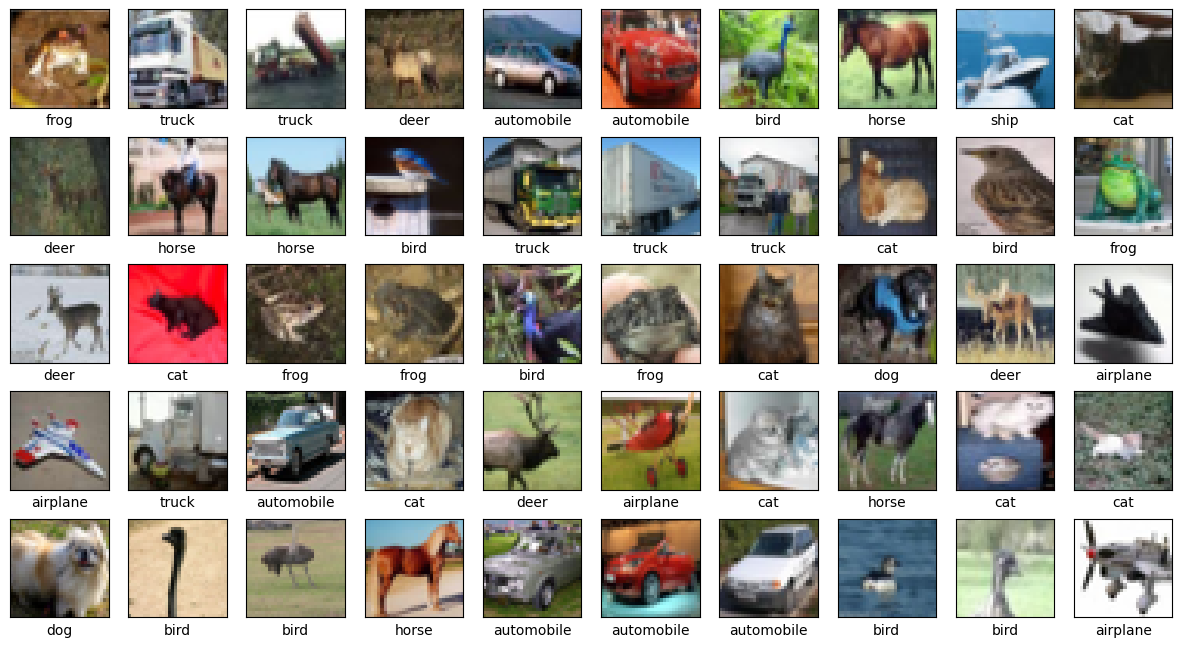

In [4]:
plt.figure(figsize=(15,8))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(X_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_name[Y_train[i][0]])

# plt.show()

In [5]:
X_train,X_test =X_train/255.0,X_test/255.0

In [6]:
model = keras.Sequential([
    keras.Input((32,32,3)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),

    layers.Dense(10,activation='softmax')

])


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor
    patience=3,              # Number of epochs to wait without improvement
    restore_best_weights=True # Restore model weights from the best epoch
)


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
h=model.fit(
    x=X_train,
    y=Y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping],
    batch_size=32)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3263 - loss: 1.8191 - val_accuracy: 0.4951 - val_loss: 1.4808
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5325 - loss: 1.2940 - val_accuracy: 0.5954 - val_loss: 1.2292
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5979 - loss: 1.1314 - val_accuracy: 0.6472 - val_loss: 1.0742
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6384 - loss: 1.0298 - val_accuracy: 0.6700 - val_loss: 1.0444
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6668 - loss: 0.9492 - val_accuracy: 0.6759 - val_loss: 0.9983
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6844 - loss: 0.8962 - val_accuracy: 0.6623 - val_loss: 0.9868
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7011 - loss: 0.8492 - val_accuracy: 0.7084 - val_loss: 0.9042
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7167 - loss: 0.8097 - 

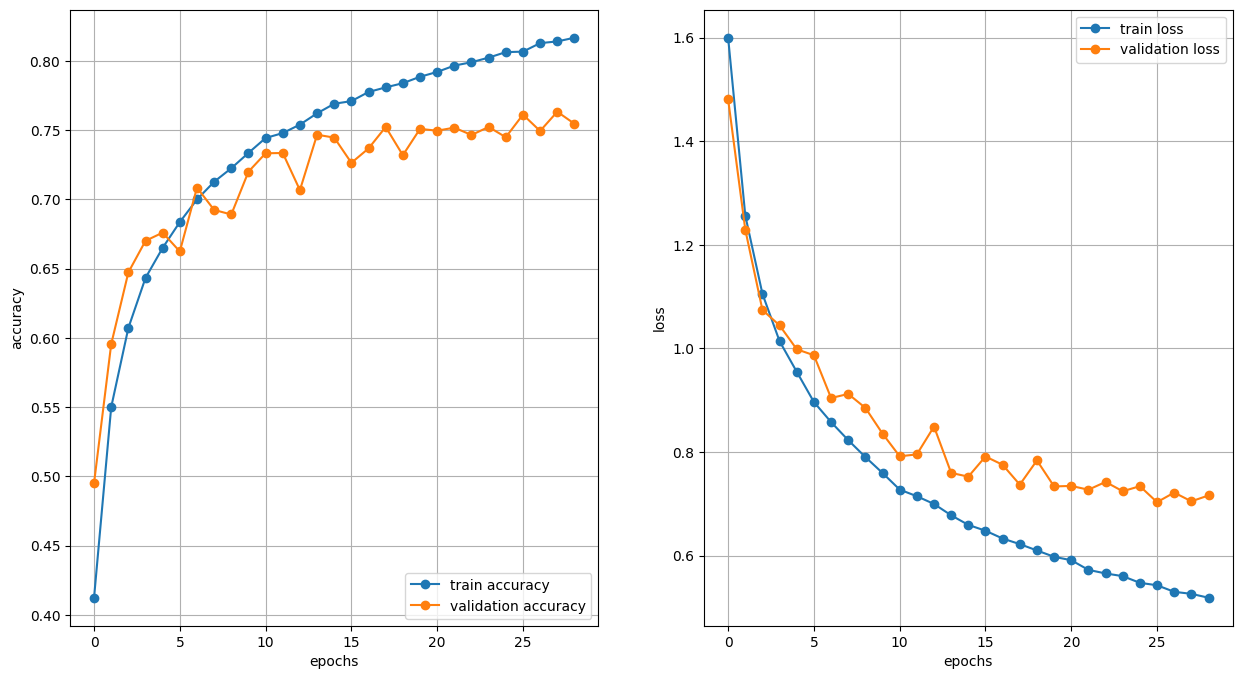

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],'o-',label='train accuracy')
plt.plot(h.history['val_accuracy'],'o-',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'],'o-',label='train loss')
plt.plot(h.history['val_loss'],'o-',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend(loc='upper right')


In [12]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7523 - loss: 0.7141

Test Accuracy: 0.7487999796867371

Test Loss: 0.7221820950508118


In [13]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [14]:
predictions[0]

array([1.9565493e-02, 4.7568840e-04, 5.5476893e-03, 6.9037795e-01,
       4.7419639e-03, 2.6059046e-01, 6.8930592e-03, 2.2394061e-03,
       3.0666098e-03, 6.5016202e-03], dtype=float32)

In [15]:
np.argmax(predictions[0])

3

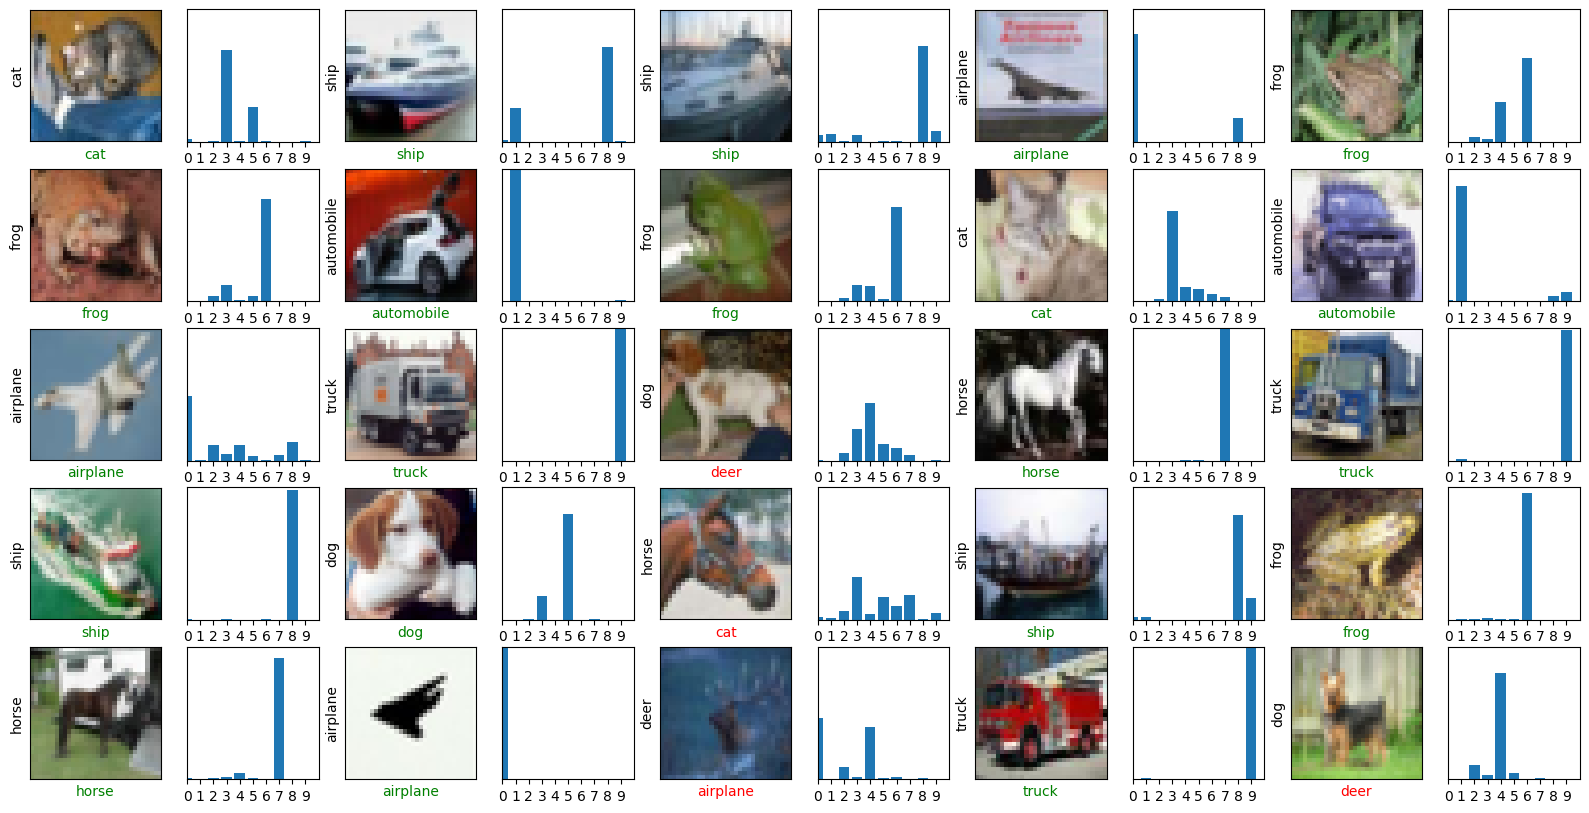

In [17]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_name[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_name[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_name[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()
